### Code to generate the data:
python -m grid --n 4 interface "python SVC.py --dataset interface --dist normal --test 1 --pte 10000 --kernel laplace --sigma 100 --xlim -1 -0.9" --seed 0 1 2 3 4 5 6 7 8 9 --d 5 10 --ptr 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

### Figures for the paper

In [2]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [3]:
name = "gap"
d = 5
dic = {"d": d}
xlims = utils.get_argument(name, "xlim", dic)

data = {"err": dict(), "Delta": dict()}
for xlim in xlims:
    dic["xlim"] = xlim
    data_err = utils.get_test_error(name, dic)
    data_Delta = utils.get_Delta(name, dic)
    data["err"][xlim] = utils.class_data(data_err, dic, "ptr")
    data["Delta"][xlim] = utils.class_data(data_Delta, dic, "ptr")

<IPython.core.display.Javascript object>


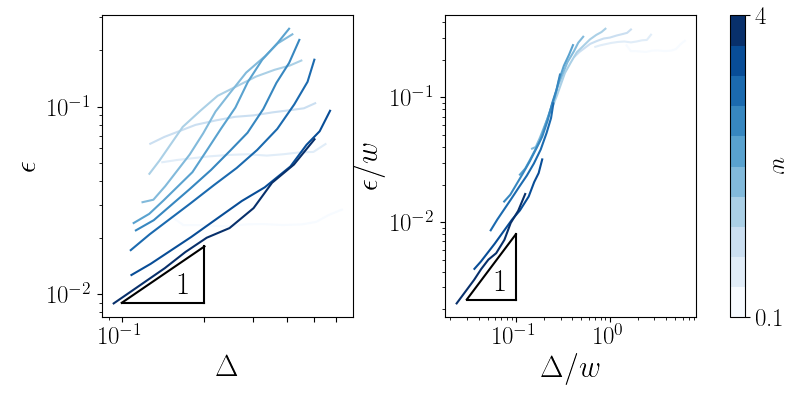

In [4]:
%matplotlib notebook

ws = np.array([xlim[1] - xlim[0] for xlim in xlims])
cmap = cm.get_cmap('Blues', len(ws))

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

dummie_cax = ax[0].scatter(ws, ws, c=ws, cmap=cmap)
ax[0].cla()

for i, xlim in enumerate(xlims):    
    ps, err = utils.get_mean(data["err"][xlim])
    ps, Delta = utils.get_mean(data["Delta"][xlim])
    ax[0].plot(Delta, err, color=cmap(i))
    ax[1].plot(Delta / (xlim[1] - xlim[0]), err / (xlim[1] - xlim[0]), color=cmap(i))
# benchmark left
x1, x2, y1 = 1e-1, 2e-1, 1.8e-2
beta = 1
y2 = 10**(np.log10(y1) - beta * (np.log10(x2) - np.log10(x1)))
ax[0].plot([x1, x2], [y2, y2], [x2, x2], [y2, y1], [x1, x2], [y2, y1], color='k')
ax[0].text(1.6e-1, 1e-2, r"$1$", fontsize=22)
# benchmark right
x1, x2, y1 = 3e-2, 1e-1, .8e-2
beta = 1
y2 = 10**(np.log10(y1) - beta * (np.log10(x2) - np.log10(x1)))
ax[1].plot([x1, x2], [y2, y2], [x2, x2], [y2, y1], [x1, x2], [y2, y1], color='k')
ax[1].text(6e-2, .28e-2, r"$1$", fontsize=22)

ax[0].set_xlabel(r"$\Delta$", fontsize=22)
ax[0].set_ylabel(r"$\epsilon$", fontsize=22)
ax[0].set(xscale='log', yscale='log')
ax[0].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax[0].set_xticklabels([r"$10^{-1}$", None, None, None, None, None])
ax[0].tick_params(labelsize=18)

ax[1].set_xlabel(r"$\Delta / w$", fontsize=22)
ax[1].set_ylabel(r"$\epsilon / w$", fontsize=22)
ax[1].set(xscale='log', yscale='log')
ax[1].tick_params(labelsize=18)

plt.tight_layout()
cb = fig.colorbar(dummie_cax, ax=ax, fraction=0.08)
cb.set_ticks([0.1, 4])
cb.set_ticklabels([0.1, 4])
cb.set_label(r"$w$", rotation=270, fontsize=18)
cb.ax.tick_params(labelsize=18)

#plt.savefig("path_to_figure", format="pdf")